In [10]:
!conda install -y pynndescent

Solving environment: done

## Package Plan ##

  environment location: /Users/wilson.marcilio/miniforge3/envs/gflow_env

  added / updated specs:
    - pynndescent


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    llvmlite-0.39.1            |   py38he6bf707_1         248 KB  conda-forge
    numba-0.56.3               |   py38h947a10e_0         4.0 MB  conda-forge
    pynndescent-0.5.8          |     pyh1a96a4e_0          47 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.2 MB

The following NEW packages will be INSTALLED:

  libllvm11          conda-forge/osx-arm64::libllvm11-11.1.0-hfa12f05_5 None
  llvmlite           conda-forge/osx-arm64::llvmlite-0.39.1-py38he6bf707_1 None
  numba              conda-forge/osx-arm64::numba-0.56.3-py38h947a10e_0 None
  pynndescent        conda-forge/noarch::pyn

In [11]:
import humap
import numpy as np
import pandas as pd
import time
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.utils import check_array
import matplotlib.pyplot as plt

In [12]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
# if you have low memory
X, _, y, _ = train_test_split(X, y, test_size=0.7, random_state=0)
X = normalize(X)
print(X.shape, y.shape)


(21000, 784) (21000,)


In [13]:
%%time
hUmap1 = humap.HUMAP(np.array([0.2, 0.2]), knn_algorithm="NNDescent", reproducible=True)
hUmap1.fit(X, y)

hUmap2 = humap.HUMAP(np.array([0.2, 0.2]), knn_algorithm="NNDescent", reproducible=True)
hUmap2.fit(X, y)

hUmap3 = humap.HUMAP(np.array([0.2, 0.2]), knn_algorithm="NNDescent", reproducible=True)
hUmap3.fit(X, y)


Sat Nov  5 11:28:31 2022 Building RP forest with 12 trees
Sat Nov  5 11:28:33 2022 NN descent for 14 iterations


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


	 1  /  14
	 2  /  14
	 3  /  14
	Stopping threshold met -- exiting after 3 iterations
Sat Nov  5 11:28:49 2022 Building RP forest with 12 trees
Sat Nov  5 11:28:49 2022 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	Stopping threshold met -- exiting after 3 iterations
Sat Nov  5 11:29:00 2022 Building RP forest with 12 trees
Sat Nov  5 11:29:01 2022 NN descent for 14 iterations
	 1  /  14
	 2  /  14
	 3  /  14
	Stopping threshold met -- exiting after 3 iterations
CPU times: user 3min 5s, sys: 12.4 s, total: 3min 17s
Wall time: 48.1 s


In [14]:
%%time
embedding_1 = hUmap1.transform(2)
y_1 = hUmap1.labels(2)

embedding_2 = hUmap2.transform(2)
y_2 = hUmap2.labels(2)

embedding_3 = hUmap3.transform(2)
y_3 = hUmap3.labels(2)



*************************************************************************
*********************************LEVEL 0*********************************
*************************************************************************

Level 0 with 21000 data samples.
Fitting the first hierarchy level... 

*************************************************************************
*********************************LEVEL 0*********************************
*************************************************************************

Level 0 with 21000 data samples.
Fitting the first hierarchy level... 
done in 24.123295 seconds.


*************************************************************************
*********************************LEVEL 1*********************************
*************************************************************************

Level 1: 4200 data samples.Computing random walks for sampling selection... 
done in 0.161452 seconds.
Computing random walks for constucting representation 

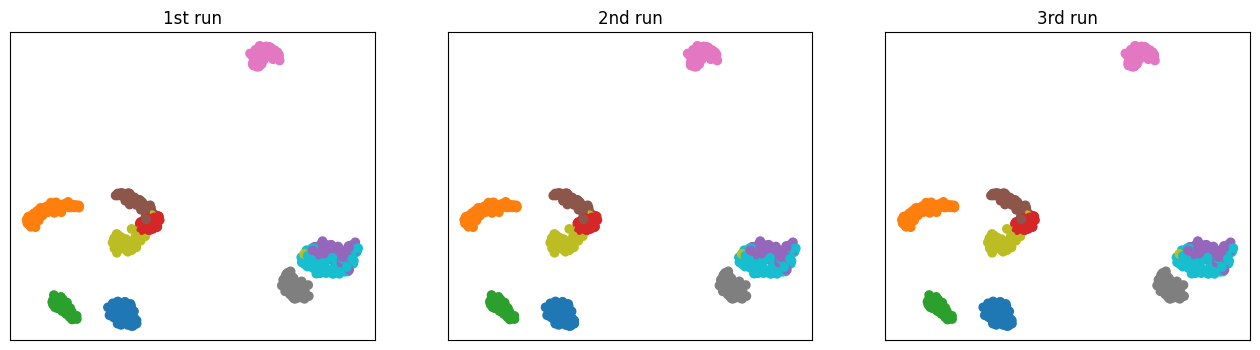

In [15]:
fig, axs = plt.subplots(1, 3, figsize=(16, 4))


axs[0].scatter(embedding_1[:, 0], embedding_1[:, 1], c=y_1.astype(int), alpha=1, cmap='tab10')
axs[0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
axs[0].tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 
axs[0].set_title('1st run')


axs[1].scatter(embedding_2[:, 0], embedding_2[:, 1], c=y_2.astype(int), alpha=1, cmap='tab10')
axs[1].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
axs[1].tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 
axs[1].set_title('2nd run')

axs[2].scatter(embedding_3[:, 0], embedding_3[:, 1], c=y_3.astype(int), alpha=1, cmap='tab10')
axs[2].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False) 
axs[2].tick_params(axis='y', which='both', left=False, right=False, labelleft=False) 
axs[2].set_title('3rd run')

# plt.savefig('rep.png', bbox_inches='tight')
plt.show()


In [16]:
np.array_equal(embedding_1, embedding_2), np.array_equal(embedding_2, embedding_3)

(True, True)